1. <b>X_Minimum</b>: The minimum x-coordinate of the bounding box of the defect.
2. <b>X_Maximum</b>: The maximum x-coordinate of the bounding box of the defect.
3. <b>Y_Minimum</b>: The minimum y-coordinate of the bounding box of the defect.
4. <b>Y_Maximum</b>: The maximum y-coordinate of the bounding box of the defect.
5. <b>Pixels_Areas</b>: The total number of pixels in the defect area.
6. <b>X_Perimeter</b>: The perimeter of the defect in the x-direction.
7. <b>Y_Perimeter</b>: The perimeter of the defect in the y-direction.
8. <b>Sum_of_Luminosity</b>: The sum of luminosity values in the defect area.
9. <b>Minimum_of_Luminosity</b>: The minimum luminosity value in the defect area.
10. <b>Maximum_of_Luminosity</b>: The maximum luminosity value in the defect area.
11. <b>Length_of_Conveyer</b>: The length of the conveyer where the defect was detected.
12. <b>TypeOfSteel_A300</b>: Binary indicator for type of steel A300.
13. <b>TypeOfSteel_A400</b>: Binary indicator for type of steel A400.
14. <b>Steel_Plate_Thickness</b>: Thickness of the steel plate.
15. <b>Edges_Index</b>: Index indicating the ratio of the total length of edges to the perimeter.
16. <b>Empty_Index</b>: Index indicating the ratio of empty spaces to the defect area.
17. <b>Square_Index</b>: Index indicating the ratio of the square of perimeter to the defect area.
18. <b>Outside_X_Index</b>: Index indicating the ratio of the number of exterior contours to the defect area in the x-direction.
19. <b>Edges_X_Index</b>: Index indicating the ratio of the number of edges in the x-direction to the defect area.
20. <b>Edges_Y_Index</b>: Index indicating the ratio of the number of edges in the y-direction to the defect area.
21. <b>Outside_Global_Index</b>: Index indicating the ratio of the number of exterior contours to the defect area globally.
22. <b>LogOfAreas</b>: The logarithm of the defect area.
23. <b>Log_X_Index</b>: Index indicating the ratio of the logarithm of the defect area to the defect length in the x-direction.
24. <b>Log_Y_Index</b>: Index indicating the ratio of the logarithm of the defect area to the defect length in the y-direction.
25. <b>Orientation_Index</b>: Index indicating the orientation of the defect.
26. <b>Luminosity_Index</b>: Index indicating the luminosity of the defect.
27. <b>SigmoidOfAreas</b>: Sigmoid transformation of the defect area.
28. <b>Pastry</b>: Binary indicator for the presence of a pastry defect.
29. <b>Z_Scratch</b>: Binary indicator for the presence of a Z scratch defect.
30. <b>K_Scatch</b>: Binary indicator for the presence of a K scratch defect.
31. <b>Stains</b>: Binary indicator for the presence of stains.
32. <b>Dirtiness</b>: Binary indicator for the presence of dirtiness.
33. <b>Bumps</b>: Binary indicator for the presence of bumps.
34. <b>Other_Faults</b>: Binary indicator for the presence of other faults.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfm = pd.read_csv('train.csv')

In [4]:
dfm['Summary'] = dfm['Pastry'] + dfm['Z_Scratch'] + dfm['K_Scatch'] + dfm['Stains'] + dfm['Dirtiness'] + dfm['Bumps'] + dfm['Other_Faults']

In [5]:
df = dfm[dfm['Summary'] == 1]
df = df.drop(columns = ['Summary'])

In [6]:
faults_order = {
    'Pastry': 0,
    'Z_Scratch': 1,
    'K_Scatch': 2,
    'Stains': 3,
    'Dirtiness': 4,
    'Bumps': 5,
    'Other_Faults': 6
}

# Function to assign Main_Faults based on condition
def assign_main_faults(row):
    for fault, value in faults_order.items():
        if row[fault] == 1:
            return value
    return None  # or return np.nan if you prefer

# Apply the function across the rows
df['Main_Faults'] = df.apply(assign_main_faults, axis=1)

In [7]:
df

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Main_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.0104,0.1417,0,0,0,1,0,0,0,3
1,1,808,816,728350,728372,433,20,54,44478,70,...,-0.2997,0.9491,0,0,0,0,0,0,1,6
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0944,1.0000,0,0,1,0,0,0,0,2
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,-0.0402,0.4025,0,0,1,0,0,0,0,2
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,-0.2455,0.9998,0,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,0.0044,0.2901,0,0,0,1,0,0,0,3
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,-0.0989,0.5378,0,0,0,0,0,0,1,6
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,-0.4283,0.9997,1,0,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,-0.1162,0.3509,0,0,0,0,0,0,1,6


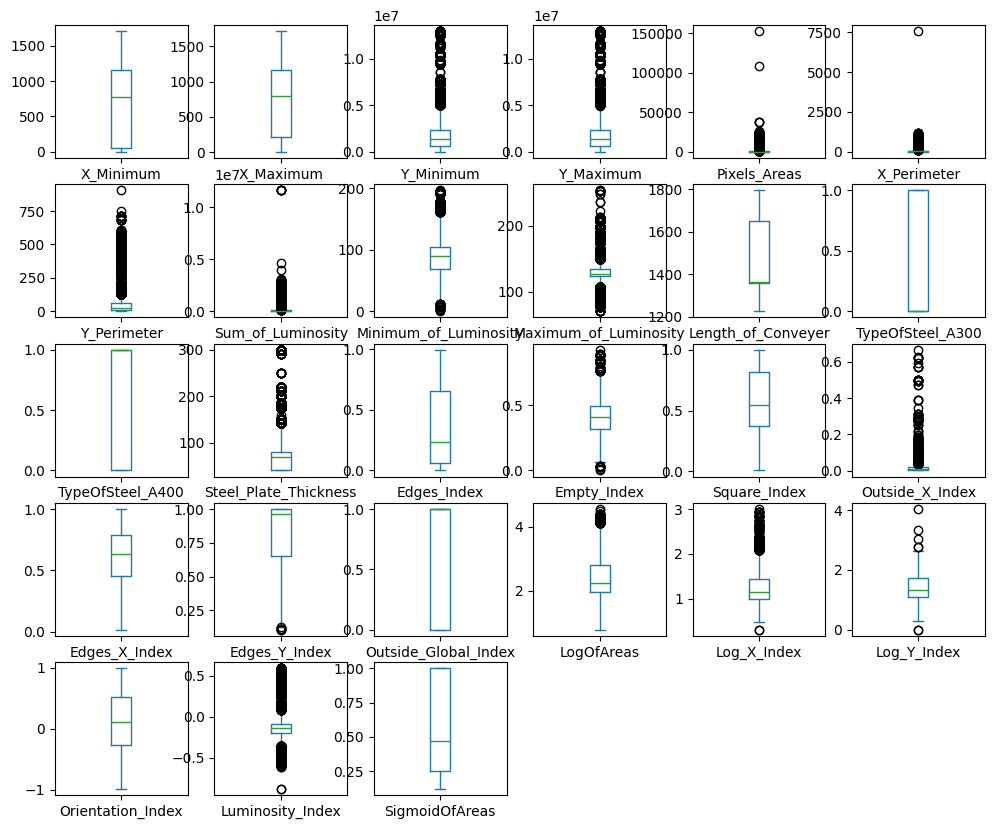

In [9]:
features = df.columns[:-8][1:]
df[features].plot(kind = 'box', subplots = True, layout = (5, 6), figsize = (12, 10))
plt.show()

<Axes: >

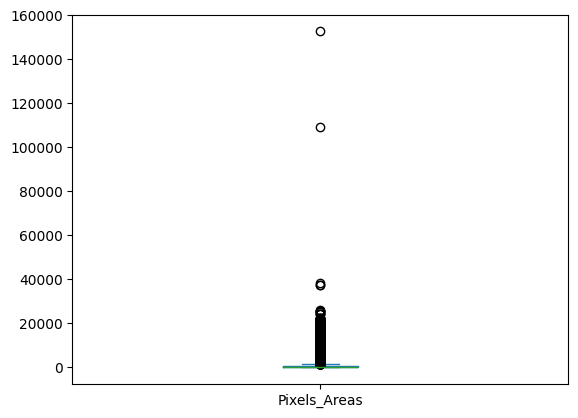

In [10]:
df['Pixels_Areas'].plot(kind = 'box')

In [11]:
df_o = df[df['Pixels_Areas'] > 28000]
len(df_o)

5

In [12]:
# Pixel Areas Outlier Removed
df = df[df['Pixels_Areas'] < 30000]

<Axes: >

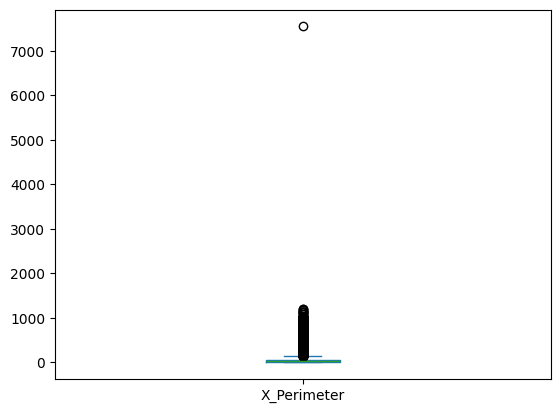

In [13]:
df['X_Perimeter'].plot(kind = 'box')

In [14]:
# X Perimeter Outlier Removed
df = df[df['X_Perimeter'] < 3000]

<Axes: >

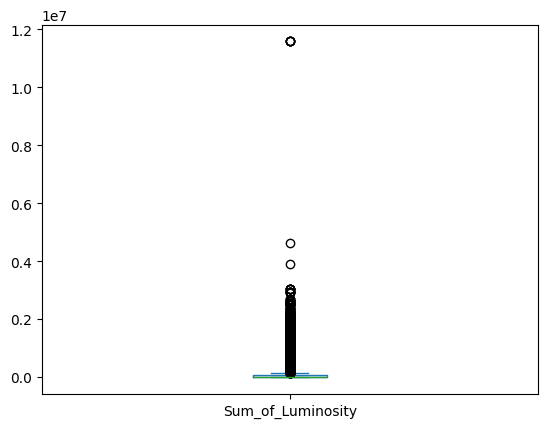

In [15]:
df['Sum_of_Luminosity'].plot(kind = 'box')

In [16]:
# Sum of Luminosity Outlier Removed
df = df[df['Sum_of_Luminosity'] < 1000000]

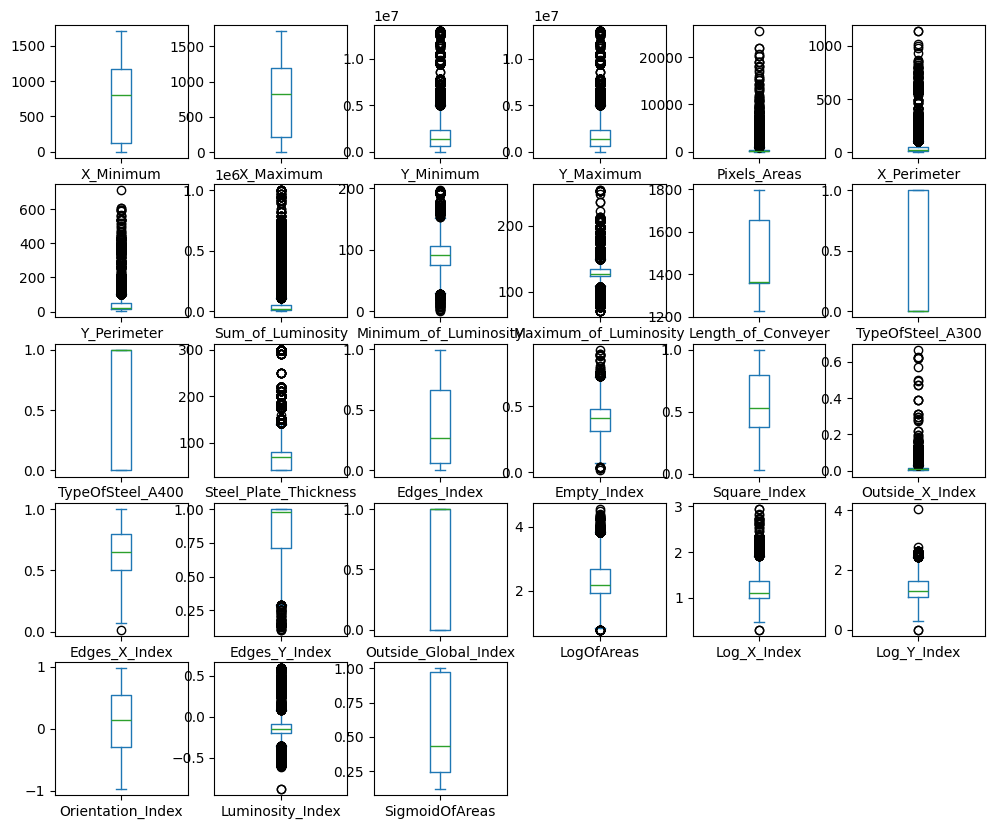

In [17]:
# Check one more time to make sure there are no more outliers
df[features].plot(kind = 'box', subplots = True, layout = (5, 6), figsize = (12, 10))
plt.show()

In [18]:
df = df.drop(columns = ['id', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])

In [19]:
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Main_Faults
0,584,590,909972,909977,16,8,5,2274,113,140,...,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,3
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,6
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,2
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,6
5,1009,1033,899231,899307,409,22,26,47513,86,118,...,0.5454,1.0000,1.0,2.6117,0.9542,1.4150,0.5909,-0.1890,0.8749,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,...,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,3
19215,723,735,2488529,2488541,231,17,26,27135,104,133,...,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,6
19216,6,31,1578055,1578129,780,114,98,71112,41,94,...,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,0
19217,9,18,1713172,1713184,126,13,26,14808,88,132,...,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,6


In [20]:
features = df.columns[:-1]
label = df.columns[-1]

<Axes: xlabel='Main_Faults'>

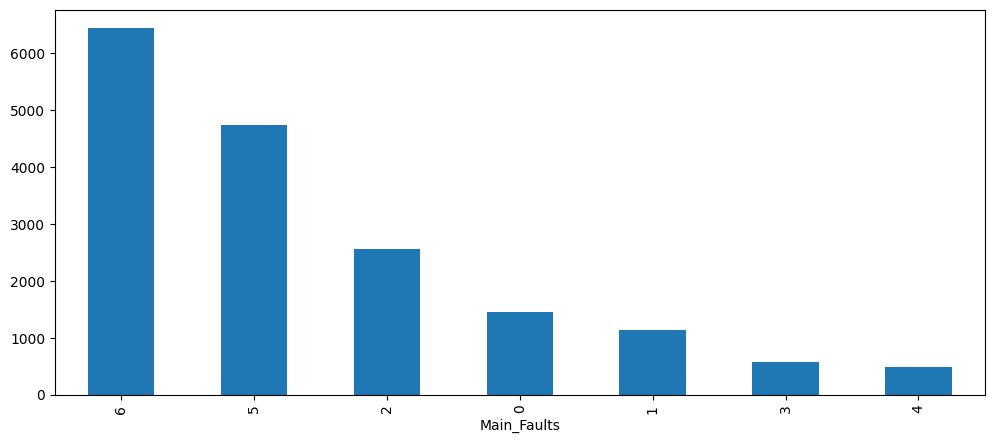

In [21]:
X = df[features]
y = df[label]
y.value_counts().plot(kind = 'bar', figsize = (12, 5))

In [22]:
X

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,584,590,909972,909977,16,8,5,2274,113,140,...,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998
5,1009,1033,899231,899307,409,22,26,47513,86,118,...,0.0053,0.5454,1.0000,1.0,2.6117,0.9542,1.4150,0.5909,-0.1890,0.8749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,...,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901
19215,723,735,2488529,2488541,231,17,26,27135,104,133,...,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378
19216,6,31,1578055,1578129,780,114,98,71112,41,94,...,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997
19217,9,18,1713172,1713184,126,13,26,14808,88,132,...,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509


In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [24]:
# Scale data
mm = MinMaxScaler()
s = StandardScaler()
df_s = mm.fit_transform(X)
df_s = pd.DataFrame(X, columns = X.columns)

In [25]:
df_s

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,584,590,909972,909977,16,8,5,2274,113,140,...,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998
5,1009,1033,899231,899307,409,22,26,47513,86,118,...,0.0053,0.5454,1.0000,1.0,2.6117,0.9542,1.4150,0.5909,-0.1890,0.8749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,...,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901
19215,723,735,2488529,2488541,231,17,26,27135,104,133,...,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378
19216,6,31,1578055,1578129,780,114,98,71112,41,94,...,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997
19217,9,18,1713172,1713184,126,13,26,14808,88,132,...,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509


In [26]:
df_n =  df_s.drop(columns = ['Y_Minimum', 'Y_Maximum', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Empty_Index', 'Luminosity_Index'])

In [27]:
df_n

,X_Minimum,X_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,...,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,SigmoidOfAreas
0,584,590,16,8,5,2274,1358,0,1,50,...,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,0.1417
1,808,816,433,20,54,44478,1687,1,0,80,...,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,0.9491
3,781,789,210,16,29,3202,1387,0,1,40,...,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,0.4025
4,1540,1560,521,72,67,48231,1692,0,1,300,...,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,0.9998
5,1009,1033,409,22,26,47513,1650,1,0,70,...,0.4091,0.0053,0.5454,1.0000,1.0,2.6117,0.9542,1.4150,0.5909,0.8749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,17,4,4,2193,1360,0,0,50,...,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.2901
19215,723,735,231,17,26,27135,1652,1,0,70,...,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,0.5378
19216,6,31,780,114,98,71112,1358,0,1,200,...,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,0.9997
19217,9,18,126,13,26,14808,1692,1,0,60,...,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,0.3509


In [28]:
y

0        3
1        6
3        2
4        6
5        6
        ..
19214    3
19215    6
19216    0
19217    6
19218    5
Name: Main_Faults, Length: 17362, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_n, y, test_size = 0.2, random_state = 45)

In [34]:
import tensorflow as tf

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Ensure input shape is defined
    tf.keras.layers.Dense(7, activation='softmax')  # Adjusted to 8 units for the 8 classes
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.2, verbose = 1)

Epoch 1/20


ValueError: in user code:

    File "C:\Users\micha\anaconda3\envs\gpu_ev\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\micha\anaconda3\envs\gpu_ev\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\micha\anaconda3\envs\gpu_ev\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\micha\anaconda3\envs\gpu_ev\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\micha\anaconda3\envs\gpu_ev\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\micha\anaconda3\envs\gpu_ev\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\micha\anaconda3\envs\gpu_ev\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\micha\anaconda3\envs\gpu_ev\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\micha\anaconda3\envs\gpu_ev\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\micha\anaconda3\envs\gpu_ev\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 7) are incompatible


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier(max_depth= 25, min_samples_split=10, n_estimators = 250)

In [40]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=250)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.5692484883386122

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [46]:
from sklearn.multioutput import MultiOutputClassifier

In [47]:
ada = AdaBoostClassifier()
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
mlp = MLPClassifier(max_iter = 1000)
clist = [ada, lr, nb, knn, dt, rf, svc, mlp]
mlist = [None]*8

In [48]:
for i, m in enumerate(clist):
    mlist[i] = MultiOutputClassifier(m).fit(X_train, y_train)

ValueError: y must have at least two dimensions for multi-output regression but has only one.